# Experiment 1: EDA on the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import osmnx as ox
import geopandas as gpd

In [35]:
circuits = pd.read_csv("../data/raw/circuits.csv")
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [36]:
# Try to plot the circuits on a map

gdf = gpd.GeoDataFrame(circuits, geometry=gpd.points_from_xy(circuits.lng, circuits.lat))
gdf = gdf[['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'geometry']]
gdf.index = gdf['circuitId']
gdf.head()


,circuitId,circuitRef,name,location,country,lat,lng,alt,geometry
circuitId,,,,,,,,,
1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,POINT (144.96800 -37.84970)
2,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,POINT (101.73800 2.76083)
3,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,POINT (50.51060 26.03250)
4,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,POINT (2.26111 41.57000)
5,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,POINT (29.40500 40.95170)


/var/folders/wt/4p_q_p4x1zlchmt05y_f2mgc0000gn/T/ipykernel_83827/1037525531.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


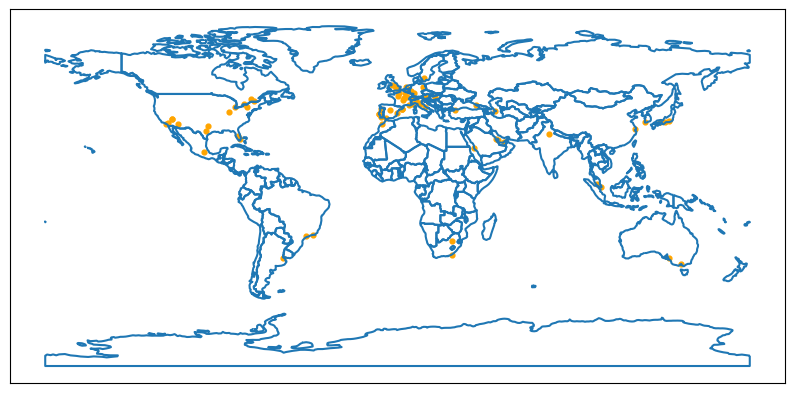

In [37]:
# Plot the circuits on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(10, 10))
gdf.plot(ax=ax, color='orange', markersize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Create a plot of the data

In [72]:
races = pd.read_csv("../data/raw/races.csv")
races = races[["raceId", "year", "round", "circuitId"]]
races.head(2)

,raceId,year,round,circuitId
0,1,2009,1,1
1,2,2009,2,2


In [73]:
race_circuits = pd.merge(races, circuits, on="circuitId")
race_circuits.head(2)

,raceId,year,round,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,2009,1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,2009,2,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.738,18,http://en.wikipedia.org/wiki/Sepang_Internatio...


In [75]:
race_circuits = race_circuits[
    [
        "raceId",
        "year",
        "round",
        "circuitId",
        "name",
        "location",
        "country",
        "lat",
        "lng",
    ]
]
race_circuits.head()

,raceId,year,round,circuitId,name,location,country,lat,lng
0,1,2009,1,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800
1,2,2009,2,2,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800
2,3,2009,3,17,Shanghai International Circuit,Shanghai,China,31.33890,121.22000
3,4,2009,4,3,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060
4,5,2009,5,4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111


In [78]:
race_circuits.to_csv("../data/processed/circuits.csv", index=False)

In [79]:
pd.read_csv("../data/processed/circuits.csv").head()

,raceId,year,round,circuitId,name,location,country,lat,lng
0,1,2009,1,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800
1,2,2009,2,2,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800
2,3,2009,3,17,Shanghai International Circuit,Shanghai,China,31.33890,121.22000
3,4,2009,4,3,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060
4,5,2009,5,4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111


In [52]:
def plot_races_on_map(start_year=2023, end_year=2023, color='red'):
    """
    Plots the Formula 1 races on a map based on the years provided    
    """
    # Filter
    races_that_year = race_circuits.query(f'{start_year} <= year <= {end_year}')
    gdf = gpd.GeoDataFrame(races_that_year, geometry=gpd.points_from_xy(races_that_year.lng, races_that_year.lat))

    # Plot
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.boundary.plot(figsize=(10, 10), alpha=0.3)
    gdf.plot(ax=ax, color=color, markersize=12)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"Formula 1 races on the years {start_year} to {end_year}")

    # Add names of the circuits
    # for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['location']):
    #     ax.text(x, y, label, fontsize=9, ha='right')

    plt.show()
    return ax

/var/folders/wt/4p_q_p4x1zlchmt05y_f2mgc0000gn/T/ipykernel_83827/266654533.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


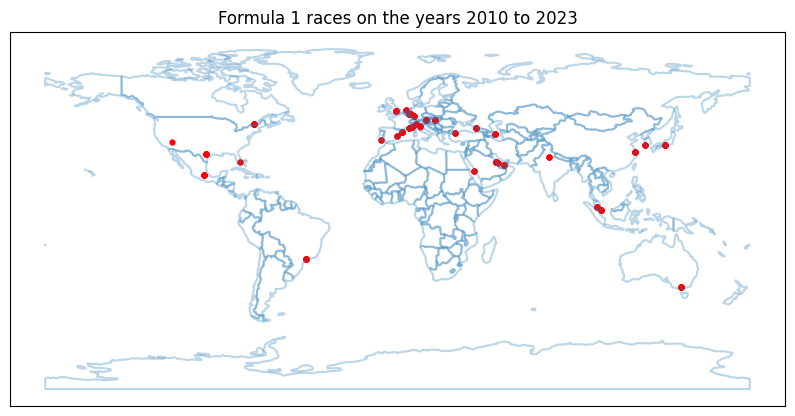

<Axes: title={'center': 'Formula 1 races on the years 2010 to 2023'}>

In [54]:
plot_races_on_map(2010, 2023)

## Plotly Express plots

In [3]:
# Plot using plotly choropleth
import plotly.express as px

In [13]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [71]:
def plot_plotly_choropleth(filtered_circuits):
    """
    Plots the Formula 1 Races in a choropleth map
    """
    fig = px.scatter_geo(
        filtered_circuits,
        lat="lat",
        lon="lng",
        hover_name="name",
        color="country",
        color_discrete_sequence=px.colors.qualitative.Dark24,
    )

    fig.update_layout(
        margin={"r": 0, "t": 25, "l": 0, "b": 0},
        clickmode="event+select",
        showlegend=False,
    )
    fig.update_geos(
        showcountries=True,
        showland=True,
        showocean=True,
        countrycolor="darkgrey",
        landcolor="lightgreen",
        oceancolor="lightblue",
    )

    return fig


plot_plotly_choropleth(circuits).show()